In [ ]:
from google.colab import drive
import os

drive.mount('/gdrive/', force_remount=True)
PATH = "/gdrive/MyDrive/CJ/2. 택배 배송 데이터/"  # 택배 배송 데이터 PATH
takbe_CSVs = os.listdir(PATH_FC)

takbe_CSVs

Mounted at /gdrive/


['2-1. 택배 배송 데이터.xlsx',
 '2-2. 택배 배송 데이터.xlsx',
 '2-3. 택배 배송 데이터.xlsx',
 '2-4. 택배 배송 데이터.xlsx',
 '2-5. 택배 배송 데이터.xlsx',
 '2-6. 택배 배송 데이터.xlsx',
 '2-7. 택배 배송 데이터.xlsx',
 '2-8. 택배 배송 데이터.xlsx',
 '2-9. 택배 배송 데이터.xlsx',
 '2-10. 택배 배송 데이터.xlsx',
 '2-11. 택배 배송 데이터.xlsx',
 '2-12. 택배 배송 데이터.xlsx',
 '2-13. 택배 배송 데이터.xlsx',
 '2-14. 택배 배송 데이터.xlsx']

In [ ]:
import pandas as pd

df1 = pd.read_excel(PATH + takbe_CSVs[0])
df2 = pd.read_excel(PATH + takbe_CSVs[1])
df3 = pd.read_excel(PATH + takbe_CSVs[2])
df4 = pd.read_excel(PATH + takbe_CSVs[3])
df5 = pd.read_excel(PATH + takbe_CSVs[4])
df6 = pd.read_excel(PATH + takbe_CSVs[5])
df7 = pd.read_excel(PATH + takbe_CSVs[6])
df8 = pd.read_excel(PATH + takbe_CSVs[7])
df9 = pd.read_excel(PATH + takbe_CSVs[8])
df10 = pd.read_excel(PATH + takbe_CSVs[9])
df11 = pd.read_excel(PATH + takbe_CSVs[10])
df12 = pd.read_excel(PATH + takbe_CSVs[11])
df13 = pd.read_excel(PATH + takbe_CSVs[12])
df14 = pd.read_excel(PATH + takbe_CSVs[13])

df_all = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14])

In [ ]:
df_all.head(3)

,Unnamed: 0,구분명,집화일자,집배일자,운임명,수량(BOX),운임,집화여부,집배시간,배달일자,장비구분,품목,SM명,받는분주소
0,0,배달,2021-03-02,2021-03-03,신용,1,5000,Y,190148,2021-03-03,스마트폰,식품,57,경기도 화성시 장안면 매바위로366번길 8 (주)BIT범우연구소
1,1,배달,2021-03-02,2021-03-03,선불,1,3500,Y,190149,2021-03-03,스마트폰,식품,57,경기도 화성시 장안면 버들로
2,2,배달,2021-03-01,2021-03-02,신용,1,2500,Y,143956,2021-03-02,스마트폰,식품,57,경기도 화성시 장안면 석포리


In [ ]:
df = df_all.drop(['Unnamed: 0', '구분명', '집화일자', '집배일자', '운임명', '집화여부', '집배일자', '장비구분', '품목'], axis=1)

In [ ]:
df.head(3)

,수량(BOX),운임,집배시간,배달일자,SM명,받는분주소
0,1,5000,190148,2021-03-03,57,경기도 화성시 장안면 매바위로366번길 8 (주)BIT범우연구소
1,1,3500,190149,2021-03-03,57,경기도 화성시 장안면 버들로
2,1,2500,143956,2021-03-02,57,경기도 화성시 장안면 석포리


# SM groupby 로 택배 용량 확인

In [ ]:
df_SM = df[['SM명', '배달일자', '수량(BOX)', '운임']].groupby(['SM명', '배달일자']).sum()
df_SM['val'] = df_SM['운임'] / df_SM['수량(BOX)']
df_SM

수량(BOX)       운임          val
SM명 배달일자                                     
0   2021-03-02       80   294500  3681.250000
    2021-03-03      553  2056000  3717.902351
    2021-03-04      564  2093000  3710.992908
    2021-03-05      518  1866000  3602.316602
    2021-03-06      397  1445000  3639.798489
...                 ...      ...          ...
282 2021-04-28       23   110500  4804.347826
    2021-05-04        1     5000  5000.000000
    2021-05-11       35   157000  4485.714286
    2021-05-14       48   226500  4718.750000
    2021-05-21       32   160500  5015.625000

[17869 rows x 3 columns]

In [ ]:
df_SM[(0, '2021-03-02')]

KeyError: ignored

In [ ]:
df_SM.index

MultiIndex([(  0, '2021-03-02'),
            (  0, '2021-03-03'),
            (  0, '2021-03-04'),
            (  0, '2021-03-05'),
            (  0, '2021-03-06'),
            (  0, '2021-03-08'),
            (  0, '2021-03-09'),
            (  0, '2021-03-10'),
            (  0, '2021-03-11'),
            (  0, '2021-03-12'),
            ...
            (282, '2021-04-16'),
            (282, '2021-04-20'),
            (282, '2021-04-22'),
            (282, '2021-04-26'),
            (282, '2021-04-27'),
            (282, '2021-04-28'),
            (282, '2021-05-04'),
            (282, '2021-05-11'),
            (282, '2021-05-14'),
            (282, '2021-05-21')],
           names=['SM명', '배달일자'], length=17869)

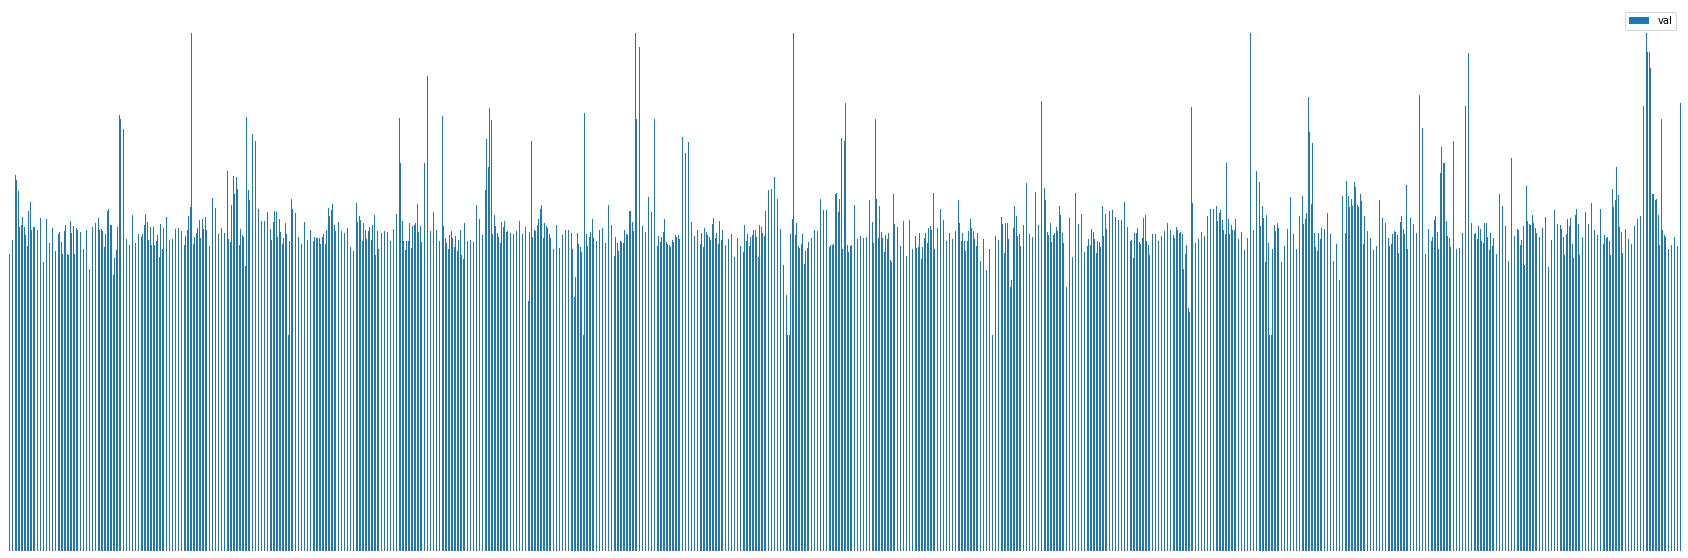

In [ ]:
import matplotlib.pyplot as plt

df_SM.plot(figsize=(30,10), kind='bar', y='val')
plt.axis('off')
plt.show()

In [ ]:
df.head(3)

,수량(BOX),운임,집배시간,배달일자,SM명,받는분주소
0,1,5000,190148,2021-03-03,57,경기도 화성시 장안면 매바위로366번길 8 (주)BIT범우연구소
1,1,3500,190149,2021-03-03,57,경기도 화성시 장안면 버들로
2,1,2500,143956,2021-03-02,57,경기도 화성시 장안면 석포리


In [ ]:
df[]